In [229]:
#Program: creditCardFraudDetection.ipynb
#Purpose: Run exploratory data analysis on dataset from Kaggle (functions this time) then attempt basic machine learning
#Dataset and Prompt (+ examples): https://www.kaggle.com/mlg-ulb/creditcardfraud
#Tutorial: https://www.thepythoncode.com/article/credit-card-fraud-detection-using-sklearn-in-python
#Date: 6 June 2023

In [230]:
#Import libraries
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns #my personal favorite visualization library

In [231]:
#Read csv file and create csv
nRowsRead = None
df1 = pd.read_csv(r'C:\Users\brett\Downloads\archive (1)\creditcard.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'creditcard.csv'

In [232]:
#Correlation matrix
#Source: see Kaggle dataset link
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()


In [233]:
#Scatter matrix with histograms on diagonal
#Source: see Kaggle dataset link
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='hist') #Changed to histograms because I prefer over kde
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [234]:
#Description text (personal code)
with open('describe_credit_card_data.txt', 'a') as describeFile:
    describeFile.truncate(0)
    columnsList = list(df1.columns)
    for column in columnsList:
        describeColumn = df1[column].describe()
        stringColumn = str(describeColumn)
        describeFile.write(stringColumn)

C:\Users\brett\AppData\Local\Temp\ipykernel_11960\3027074042.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns') # drop columns with NaN


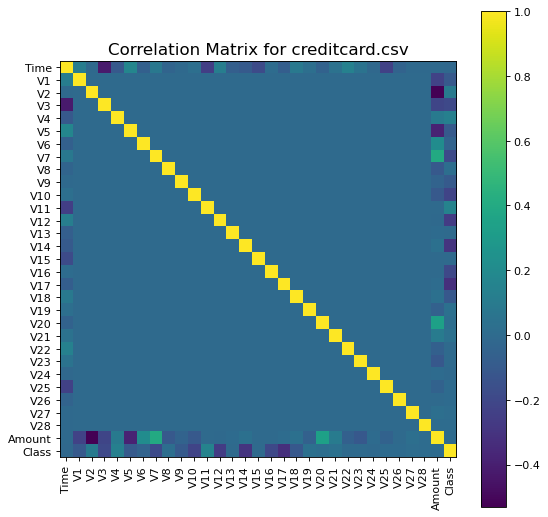

C:\Users\brett\AppData\Local\Temp\ipykernel_11960\2350213232.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns')


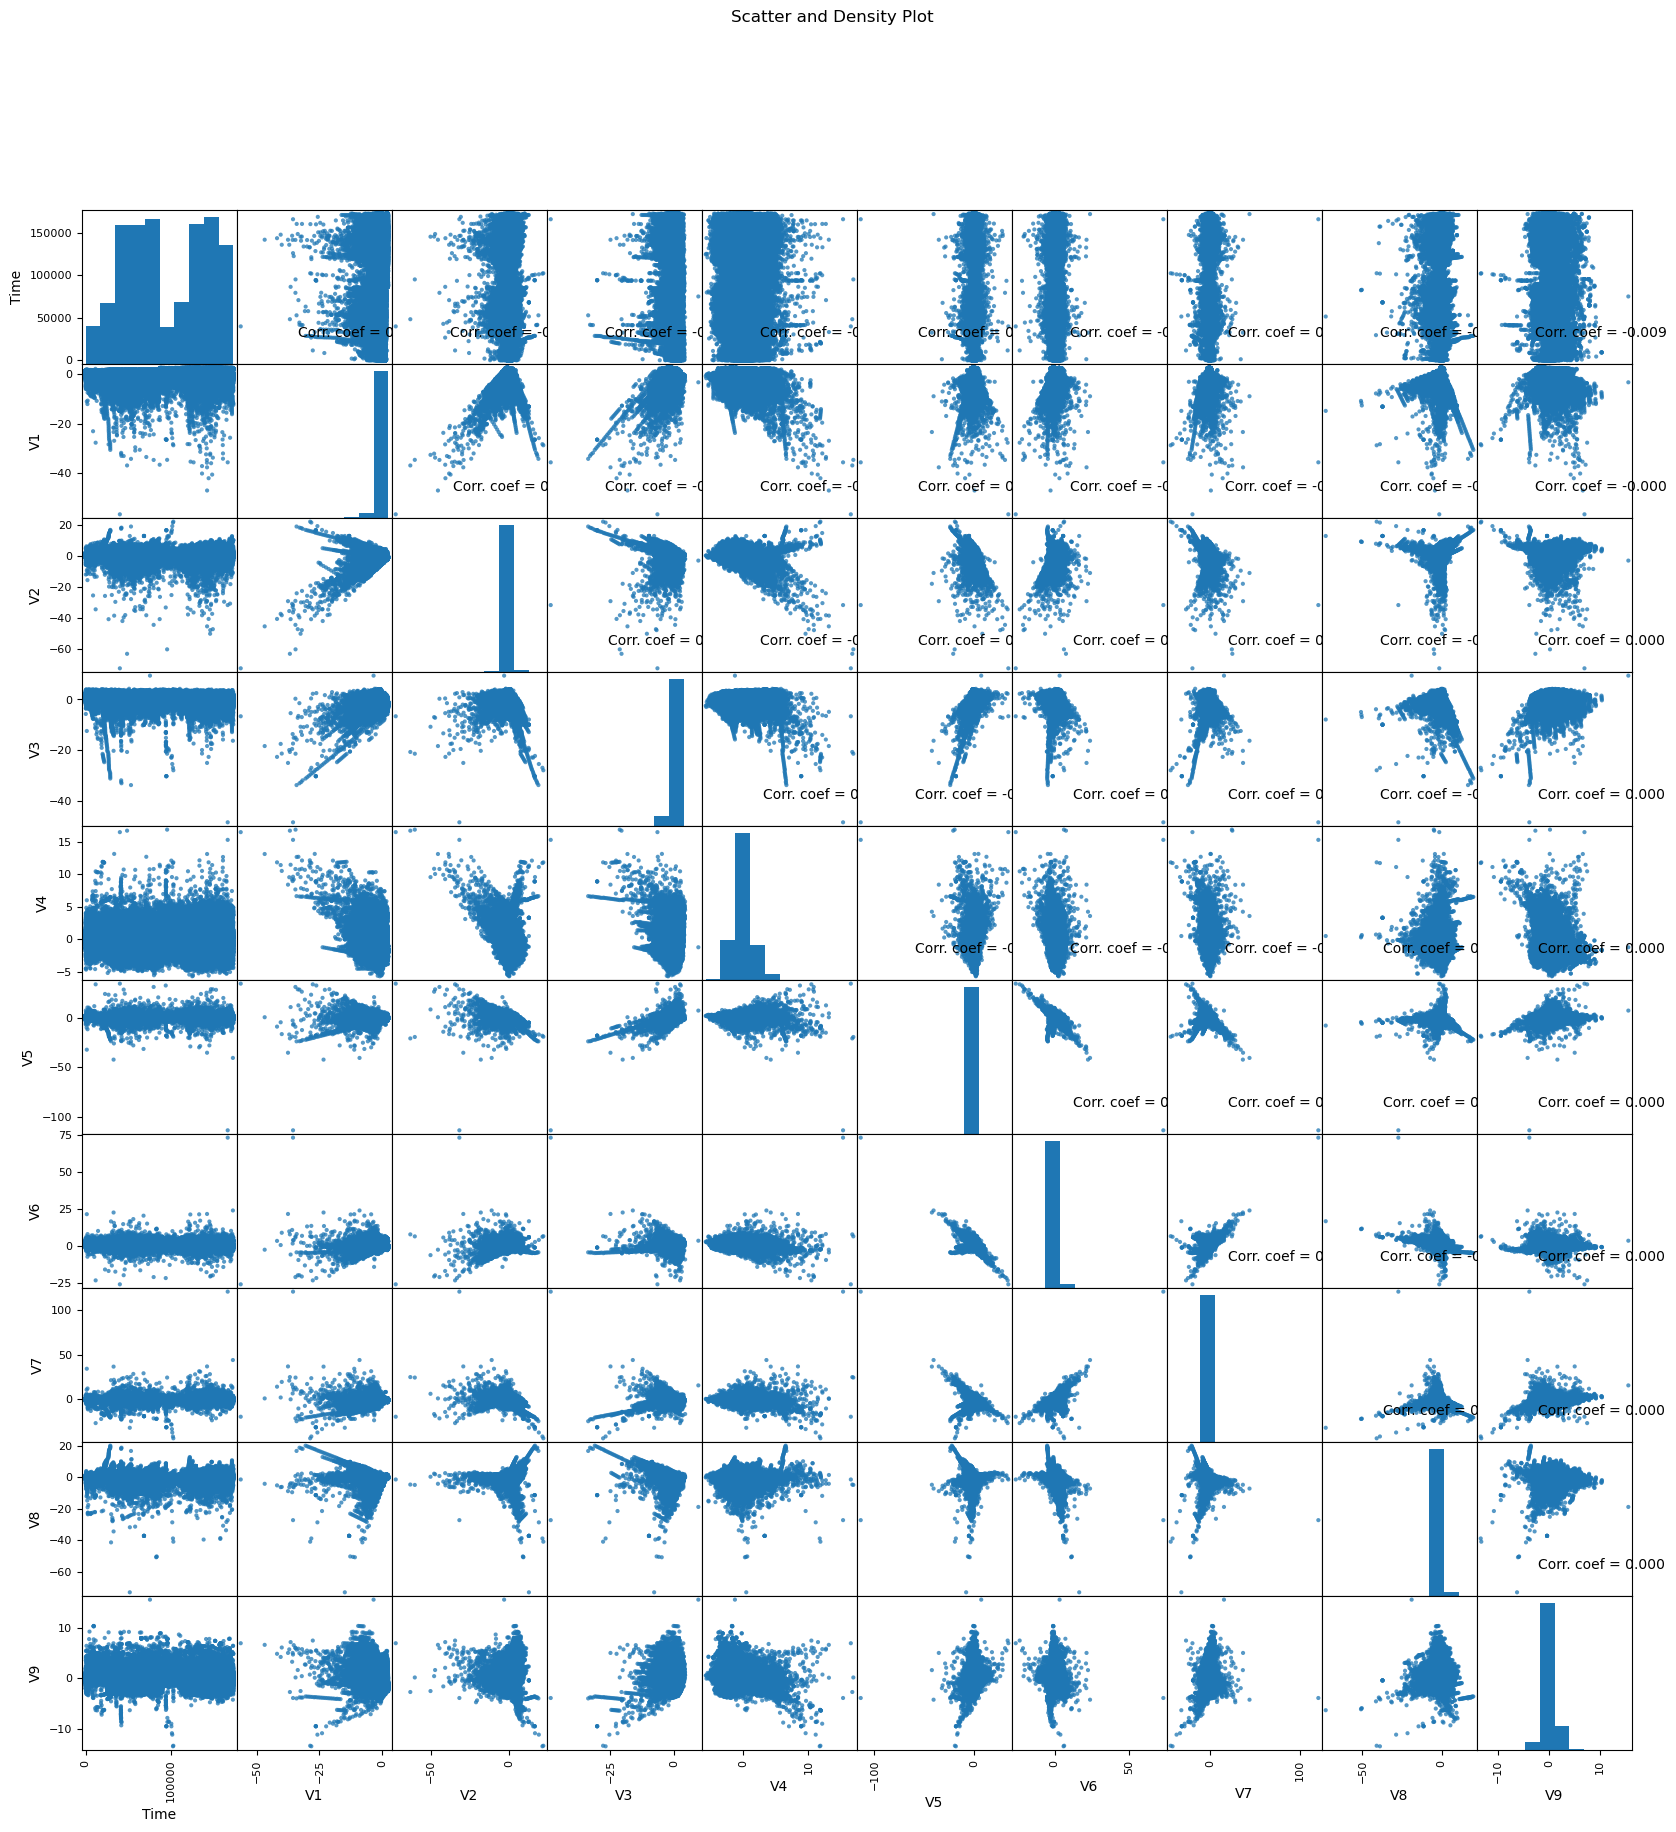

In [235]:
#Call correlation matrix and scatter matrix
plotCorrelationMatrix(df1, 8)
plotScatterMatrix(df1,20,10)

In [236]:
#Show fraud cases, valild cases, and proportion (code from tutorial but I refuse to use a pie chart)
print('Fraudulent Cases: ' + str(len(df1[df1['Class'] == 1])))
print('Fraudulent Cases: ' + str(len(df1[df1['Class'] == 0])))
print('Proportion of Fraudulent Cases: ' + str(len(df1[df1['Class'] == 1])/df1.shape[0]))

Fraudulent Cases: 492
Fraudulent Cases: 284315
Proportion of Fraudulent Cases: 0.001727485630620034


AttributeError: Rectangle.set() got an unexpected keyword argument 'kind'

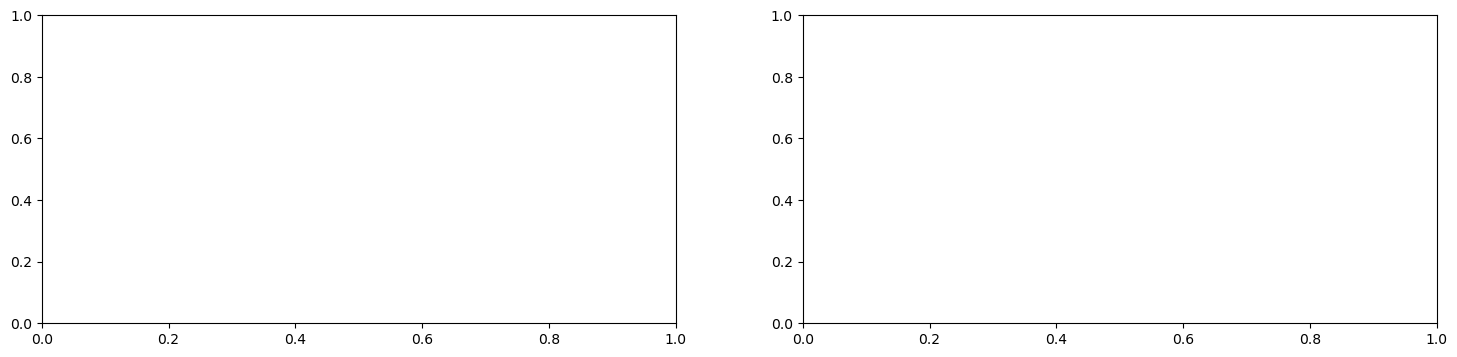

In [241]:
#Use seaborn to plot distribution of amount and distribution of time

#Create two subplots with control and sharing x values
f, axes = plt.subplots(1, 2, figsize=(18,4), sharex=True)

#Retrieve values for amount and time from dataframe
amountValue = df1['Amount'].values
timeValue = df1['Time'].values

#Plot distribution of these variables use kde in displot command from seaborn
sns.histplot(amountValue, kind='kde', color="m", kde_kws={"shade": True}, ax=axes[0]).set_title('Distribution of Amount')
sns.histplot(timeValue, kind='kde', color="m", kde_kws={"shade": True}, ax=axes[1]).set_title('Distribution of Time')

plt.show()